Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts and the US by Ability to Speak English

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

In [2]:
import os

directory = 'EnglishProficiency'
if not os.path.exists(directory):
    os.makedirs(directory)

MA state code is 25.

Data on Ability to speak English is in row 29 for each year.

Total Population data is in row 0 for each year.

In [12]:
start = 29
end = 29
ase = extract_data(start, end)

start = 0
end = 0
population = extract_data(start, end)

ase = pd.concat([ase, population]).sort_values(by=['Year'])
ase.to_csv(f"{directory}/Ability to speak English 2012-2019.csv")

In [34]:
ase_MA_all = []
ase_national_all = []
years = list(range(2012, 2019+1))
for year in years:
    ase_year = ase[ase['Year'] == year]
    ase_MA_all.append([year, (ase_year[25].iloc[0] / ase_year[25].iloc[1]) * 100])
    ase_national_all.append([year, (sum(ase_year.iloc[0,3:]) / sum(ase_year.iloc[1,3:])) * 100])

The following graph shows the change in the share of Brazilians in Massachusetts with limited English proficiency between 2012-2019.

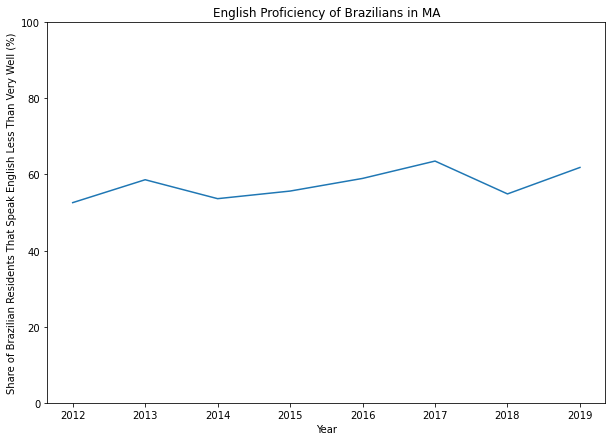

In [37]:
ase_MA_all = np.array(ase_MA_all)
plt.subplots(figsize=(10, 7))
plt.plot(years, ase_MA_all[:,1])
plt.ylim(0,100)
plt.xlabel('Year')
plt.ylabel('Share of Brazilian Residents That Speak English Less Than Very Well (%)')
plt.title('English Proficiency of Brazilians in MA')
plt.savefig(f"{directory}/BR_EngProf_Mass_since2012.png")
plt.show()

The following graph shows the change in the share of Brazilians nationwide with limited English proficiency between 2012-2019.

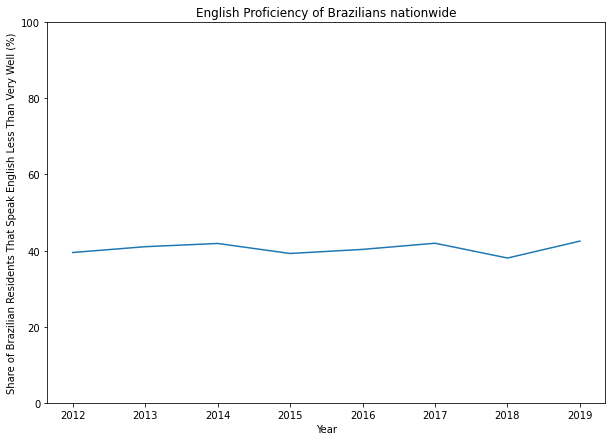

In [38]:
ase_national_all = np.array(ase_national_all)
plt.subplots(figsize=(10, 7))
plt.plot(years, ase_national_all[:,1])
plt.ylim(0,100)
plt.xlabel('Year')
plt.ylabel('Share of Brazilian Residents That Speak English Less Than Very Well (%)')
plt.title('English Proficiency of Brazilians nationwide')
plt.savefig(f"{directory}/BR_EngProf_national_since2012.png")
plt.show()